In [1]:
!pip install -q -U openai-agents

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.8/116.8 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.3/129.3 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.1/76.1 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 661.2/661.2 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 1.5 MB/s eta 0:00:00


# Get Key From here:
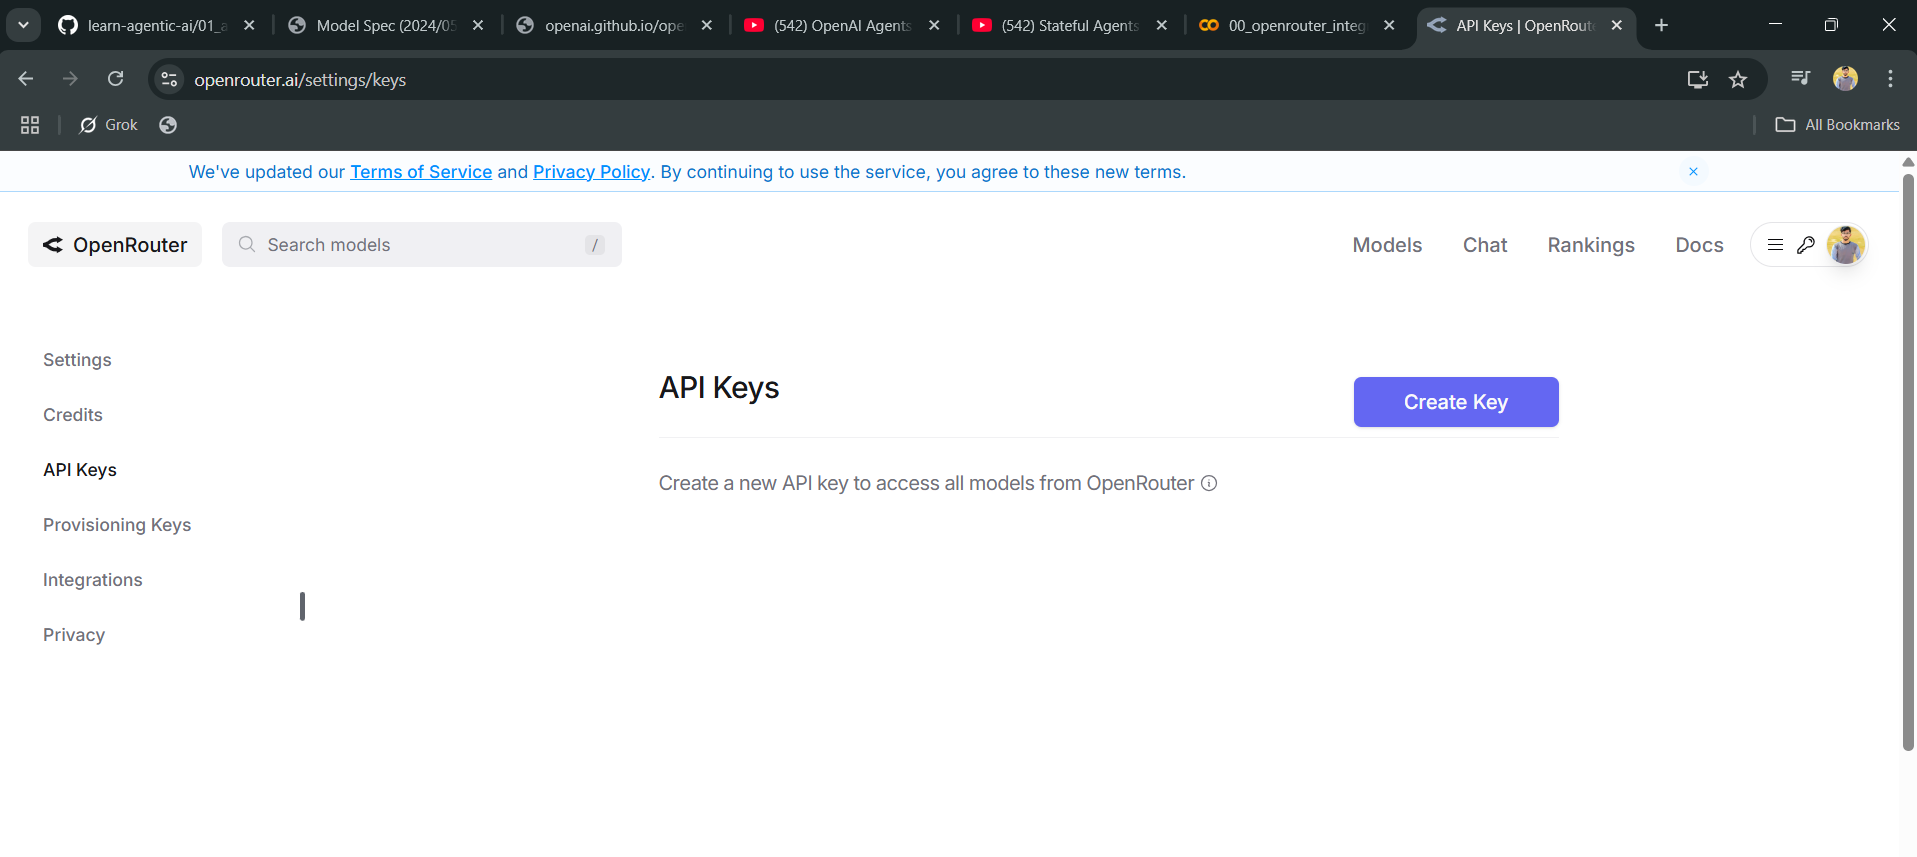

In [24]:
import nest_asyncio
nest_asyncio.apply()

In [25]:
from google.colab import userdata
OPENROUTER_API_KEY = userdata.get("OPENROUTER_API_KEY")
MODEL = "mistralai/mistral-small-3.1-24b-instruct:free"
BASE_URL = "https://openrouter.ai/api/v1"

# With OpenRouter API KEY Directly


In [34]:
import requests
import json


response = requests.post(
    url = f"{BASE_URL}/chat/completions",
    headers={
              "Authorization": f"Bearer {OPENROUTER_API_KEY}"
    },
    data = json.dumps({
        "model": MODEL,
        "messages" : [
            {
                "role": "user",
                "content": "Hello, what is Your name?"
            }
        ]
    }
)
)

print(response.json())


{'id': 'gen-1745559527-ogkLV5nQiaeRFuWcMPgy', 'provider': 'Chutes', 'model': 'mistralai/mistral-small-3.1-24b-instruct:free', 'object': 'chat.completion', 'created': 1745559527, 'choices': [{'logprobs': None, 'finish_reason': 'stop', 'native_finish_reason': 'stop', 'index': 0, 'message': {'role': 'assistant', 'content': "Hello! You can call me Assistant. I'm here to help answer your questions and provide information to the best of my ability. How about you? What's your name? (You don't need to share if you don't want to.)", 'refusal': None, 'reasoning': None}}], 'usage': {'prompt_tokens': 10, 'completion_tokens': 50, 'total_tokens': 60}}


In [26]:
from agents import Agent , Runner , OpenAIChatCompletionsModel , OpenAIChatCompletionsModel , AsyncOpenAI
from agents.run import RunConfig

provider = AsyncOpenAI(
    api_key=OPENROUTER_API_KEY,
    base_url=BASE_URL,
)

model = OpenAIChatCompletionsModel(
    model=MODEL,
    openai_client=provider,
)

config = RunConfig(
    model=model,
    tracing_disabled=True,
)

In [27]:
import asyncio

agent = Agent(
      name="Assistant",
      instructions="You are a HelpFul Chatbot.",
      model=model
)

result = Runner.run_sync(agent , "Hello, what is Your name?" , run_config=config)
print(result.final_output)




Hello! You can call me Assistant. How about you? What's your name? (You don't need to share if you don't want to, of course.)
